<a href="https://www.kaggle.com/rizwankhadim/ann-regression-problem?scriptVersionId=89864146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.drop(['Serial No.'], axis=1,inplace=True)

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
X=df.iloc[:,:-1]

In [9]:
y=df.iloc[:,-1:]

In [10]:
X.shape

(500, 7)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras import Sequential

In [16]:
model=Sequential()
model.add(Dense(9,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

2022-03-11 19:19:11.723329: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['Accuracy'])

In [19]:
history=model.fit(X_train_std,y_train,epochs=100,validation_split=0.2)

2022-03-11 19:19:12.116043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 1.0153 - Accuracy: 0.0000e+00 - val_loss: 0.8386 - val_Accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.7321 - Accuracy: 0.0000e+00 - val_loss: 0.5808 - val_Accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5045 - Accuracy: 0.0000e+00 - val_loss: 0.3863 - val_Accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3303 - Accuracy: 0.0000e+00 - val_loss: 0.2515 - val_Accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2182 - Accuracy: 0.0000e+00 - val_loss: 0.1729 - val_Accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1608 - Accuracy: 0.0000e+00 - val_loss: 0.1457 - val_Accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1439 - Accuracy: 0.0000e+00 - 

In [20]:
y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test,y_pred)

511.3202190094316

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

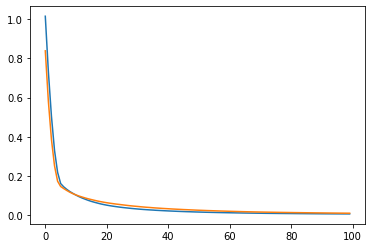

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])